# Import libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


# Load Dataset

In [4]:
# Load the dataset
url = './my_data/segmentation data.csv'

data = pd.read_csv(url)
data.head()


ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

# Perform eda
1. basic information and description

In [5]:
# Perform data analysis
print("Dataset Information:")
print(data.info())

print("\nDataset Description:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB
None

Dataset Description:
                 ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000

2. Visualization


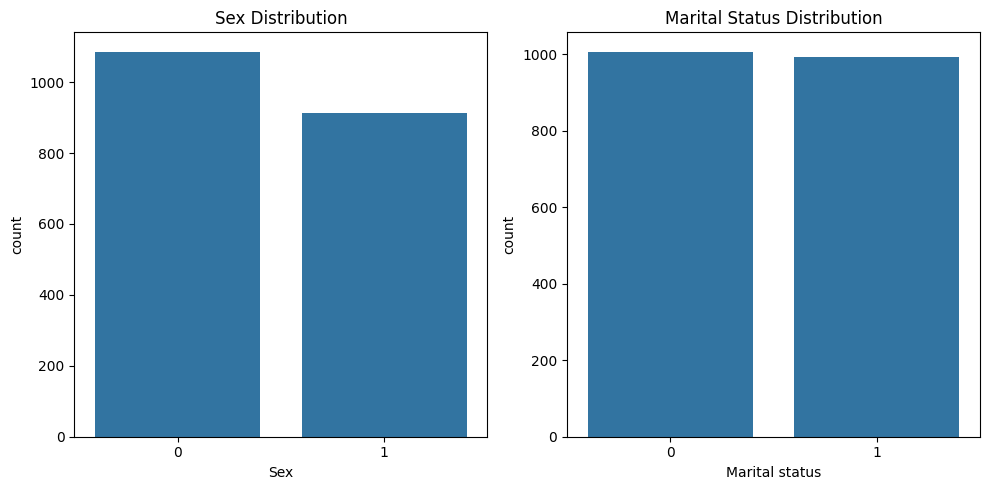

In [11]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Sex', data=data)
plt.title('Sex Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Marital status', data=data)
plt.title('Marital Status Distribution')

plt.tight_layout()
plt.show()


# Data preprocessing


In [ ]:
# Drop the ID column
data = data.drop('ID', axis=1)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Example: Checking the transformed dataset
data_scaled[:5]

# Building model (regression)

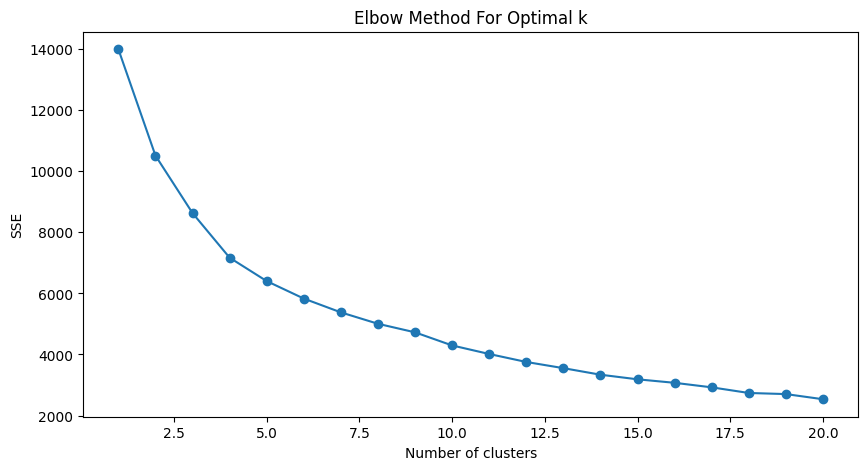

In [15]:
# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

# Build the clustering model with the optimal number of clusters (assuming 4 from the elbow method)
kmeans = KMeans(n_clusters=20, random_state=42, n_init=10)
kmeans.fit(data_scaled)

# Add the cluster labels to the dataset
data['Cluster'] = kmeans.labels_


# Making and evaluating predictions

In [16]:
# Evaluate the clustering
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.26879180394522123


# Result visualization


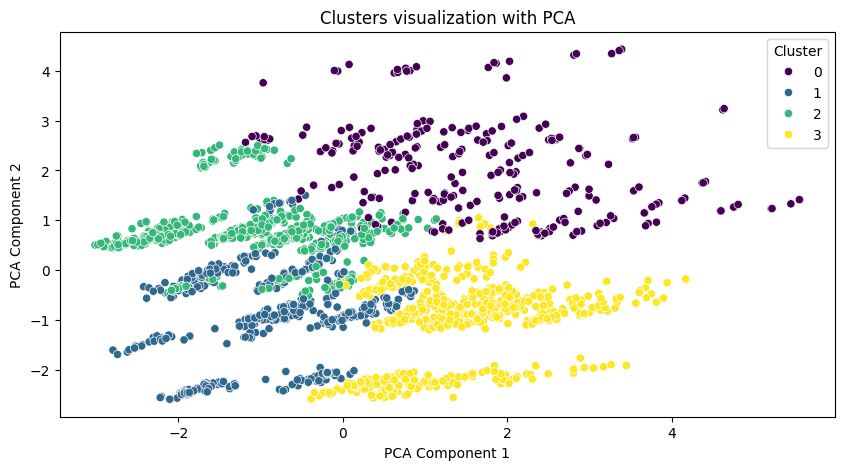

In [17]:
# Visualize the clusters using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['Cluster'], palette='viridis')
plt.title('Clusters visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
